# Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor

In [4]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Boston.csv"
Boston = pd.read_csv(url, index_col='SlNo')
Boston = pd.get_dummies(Boston, columns=['chas'], drop_first=True)
Boston.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas_1
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [6]:
X = Boston.drop('medv', axis = 1)
y = Boston.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 0.5, random_state = 0)

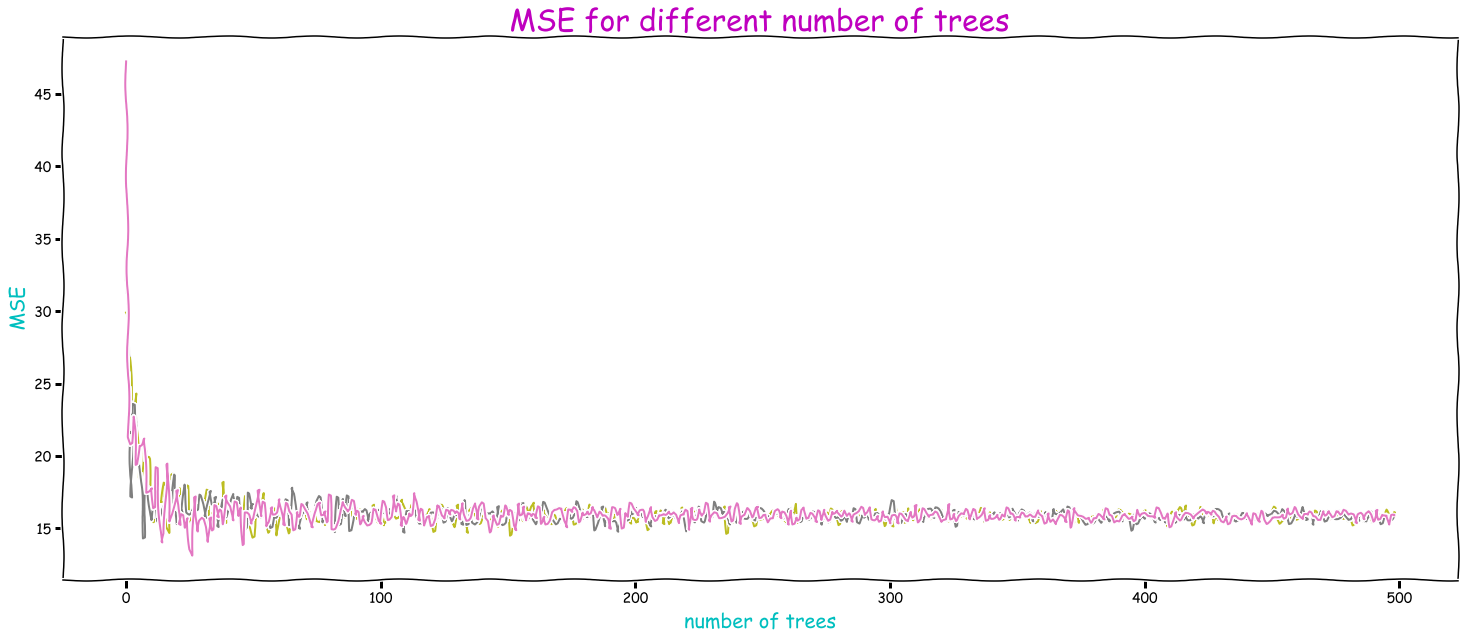

In [26]:
p = [13, 6, 4]

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('MSE for different number of trees', fontsize=30, color='m')
plt.xlabel('number of trees', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')

for j in p:
    MSE = pd.DataFrame()
    for k in range(1,500):
        rf_Boston = RandomForestRegressor(max_features=6, n_estimators=k).fit(X_train, y_train)
        rf_pred = rf_Boston.predict(X_test)
        mse = mean_squared_error(y_test, rf_pred)
        MSE = MSE.append([mse])
        
        MSE.reset_index(drop=True, inplace=True)

        plt.plot(MSE)